### 연산자 끼워넣기 백준 14888 [문제 링크](https://www.acmicpc.net/problem/14888)


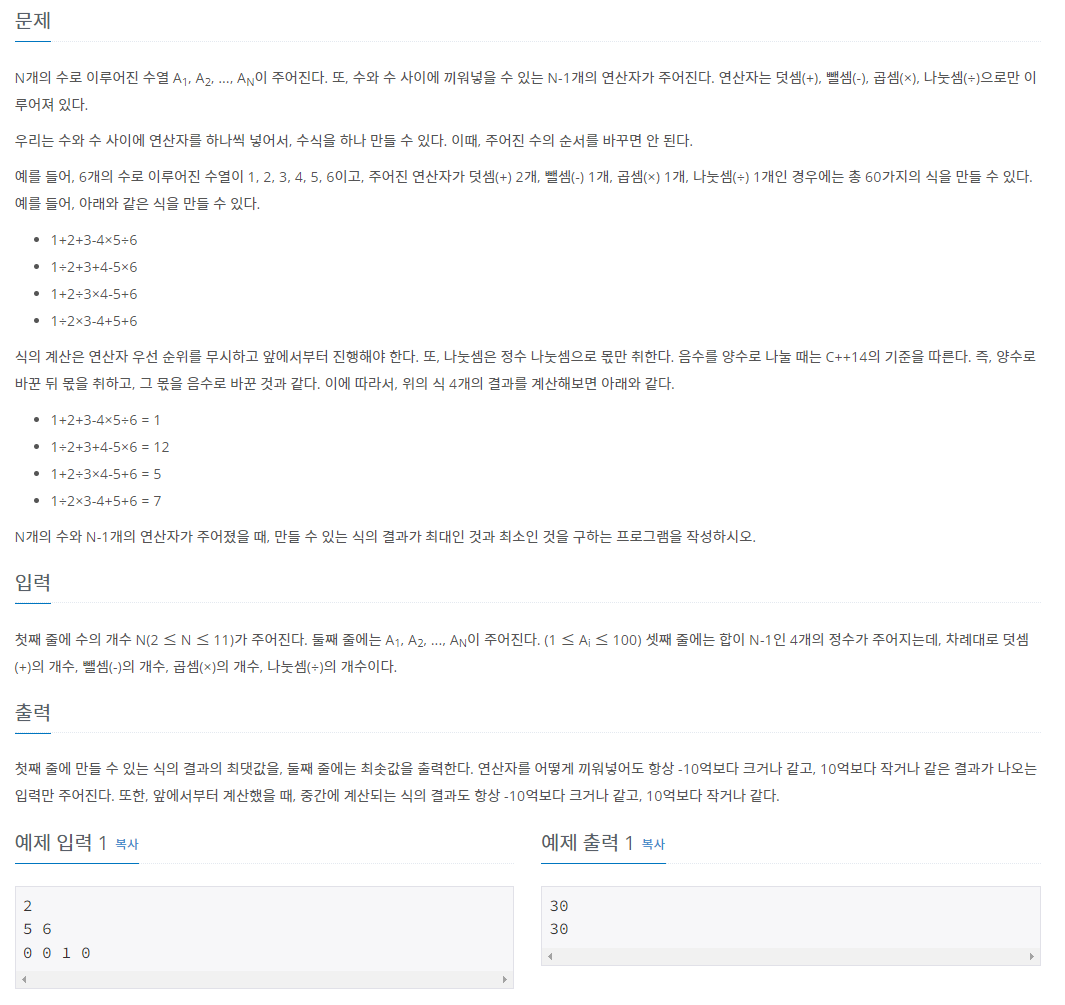

In [1]:
n= 6

## 연산자 조합 만들기 
plus, minus, mul, div  = map(int, input().split())
nums = 1,2,3,4,5,6
oper_list = []
for p in range (plus): oper_list.append('+')
for m in range (minus): oper_list.append('-')
for mu in range (mul): oper_list.append('*')
for d in range (div): oper_list.append('//')
    
from itertools import permutations 
per_oper = list(permutations(oper_list, len(oper_list)))

result = []
for oper in per_oper:
    num = nums[0]
    for idx,o in enumerate (oper):
        if o == '+':
            num += nums[idx+1]
        elif o =='-':
            num -= nums[idx+1]
        elif o =='*':
            num *= nums[idx+1]
        else:
            if num < 0:
                num = ((num*(-1)) // nums[idx+1])*(-1)
            else:
                num = num // nums[idx+1]
    result.append(num)
    
print (max(result), min(result))

2 1 1 1
54 -24


In [2]:
## dfs 
n= 6
plus, minus, mul, div  = map(int, input().split())
nums = 1,2,3,4,5,6

max_ans, min_ans = -1e9, 1e9

def solution(num, idx, add, sub, mul, div):
    global max_ans, min_ans
    if idx == n:
        max_ans = max(max_ans, num)
        min_ans = min(min_ans, num)
        return 
    
    if add > 0:
        solution(num + nums[idx], idx + 1, add - 1, sub, mul, div)
    if sub > 0:
        solution(num - nums[idx], idx + 1, add, sub - 1, mul, div)
    if mul > 0:
        solution(num * nums[idx], idx + 1, add, sub , mul -1, div)
    if div > 0:
        solution(int(num / nums[idx]), idx + 1, add, sub, mul, div -1)


solution(nums[0], 1, plus, minus, mul, div)
print(max_ans)
print(min_ans)

2 1 1 1
54
-24


### 인구 이동 백준 16234 [문제 링크](https://www.acmicpc.net/problem/16234)

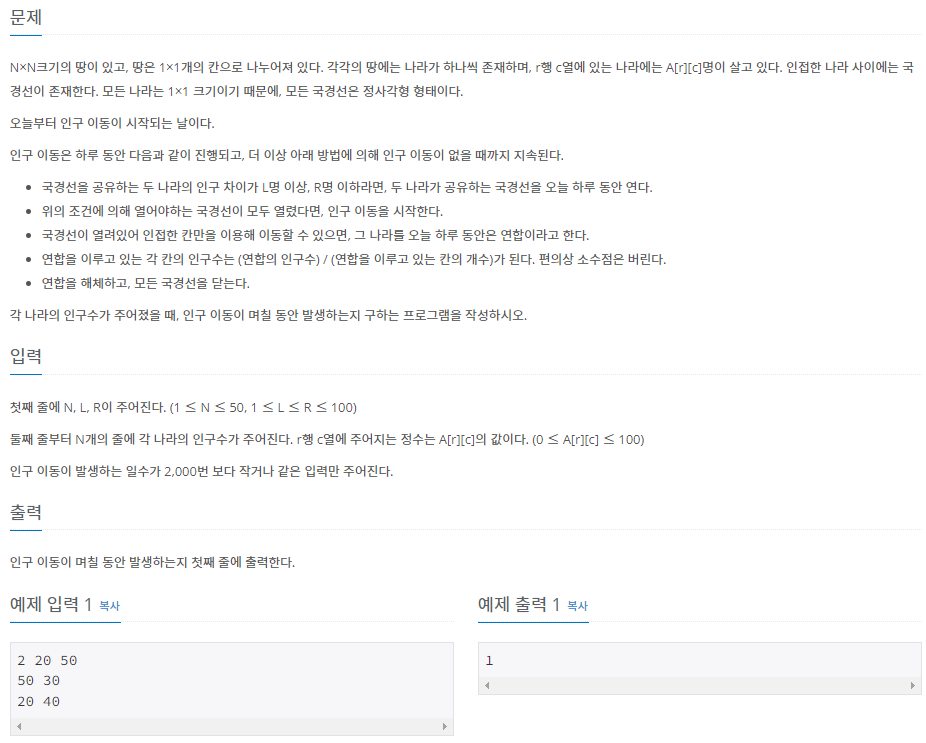
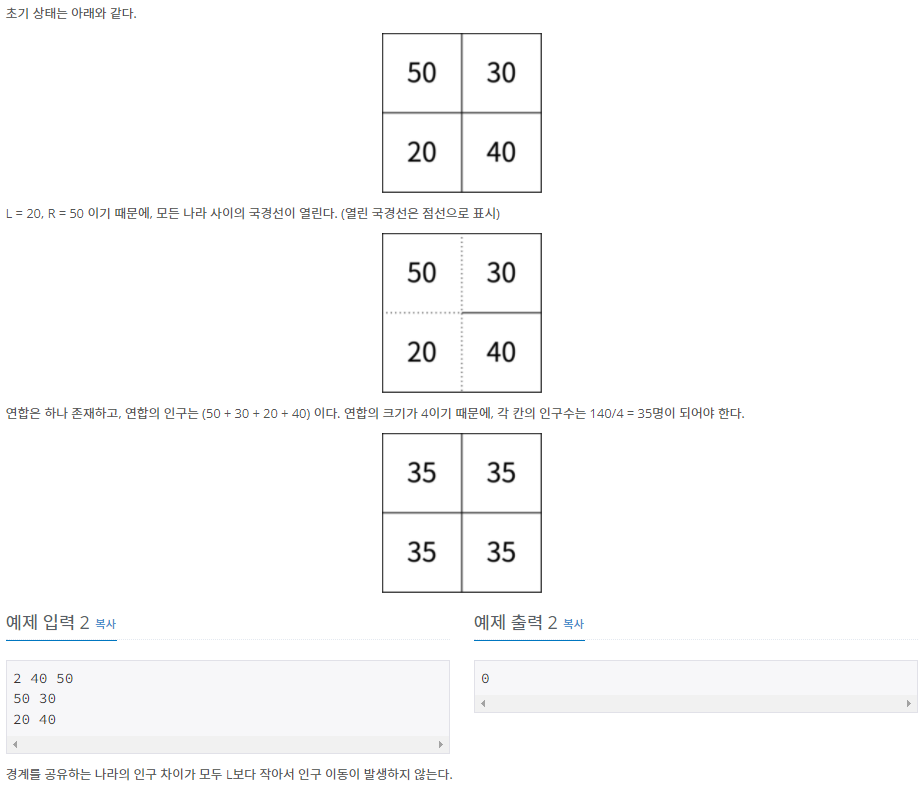

In [3]:
from collections import deque

def bfs(x,y):
    q = deque()
    q.append((x,y))
    check[x][y] = 1  ## 방문확인 
    pin = [(x,y)]    ## 좌표저장
    people = country[x][y]  ## 시작하는 곳의 인구수 
    while q:
        x,y = q.popleft()
        for f in range (4):
            nx = x + dx[f]
            ny = y + dy[f]
            if nx < 0 or nx>= n or ny < 0 or ny >= n:
                continue
            if check [nx][ny] == 1: ## 방문한 곳 패스
                continue 
            p = abs(country[x][y] - country[nx][ny])
            if l <= p <= r:  ## 방문한적 없고, 인구 차이가 조건 이내일 때 
                people += country[nx][ny]
                check[nx][ny] = 1 
                q.append((nx,ny))
                pin.append((nx,ny))
    p_new = people // len(pin)
    for p_x, p_y in pin: ## 새로운 인구수 업데이트
        country[p_x][p_y] = p_new

    return len(pin)

In [5]:
country =[[10,15,20], [20,30,25], [40,22,10]]
n = 3
l, r = 5, 10
cnt= 0 

dx = [0,0,1,-1]
dy = [1,-1,0,0]

while True :    
    stop = True
    check = [[0]*n for _ in range(n)]
    for i in range (n):
        for j in range(n):
            if check[i][j] == 0 :
                if bfs (i,j) > 1:
                    stop  = False
    if stop :
        break
    else:
        cnt += 1
print (cnt)

2
